In [12]:
pip install google-generativeai langgraph langchain langchain-google-genai langchain-community


  Using cached google_generativeai-0.8.5-py3-none-any.whl.metadata (3.9 kB)
  Using cached langchain_google_genai-2.1.4-py3-none-any.whl.metadata (5.2 kB)
  Using cached google_ai_generativelanguage-0.6.15-py3-none-any.whl.metadata (5.7 kB)
  Using cached google_api_core-2.24.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached google_api_python_client-2.169.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached google_auth-2.40.1-py2.py3-none-any.whl.metadata (6.2 kB)
  Using cached protobuf-6.30.2-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached google_api_core-2.25.0rc1-py3-none-any.whl.metadata (3.0 kB)
  Using cached proto_plus-1.26.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached googleapis_common_protos-1.70.0-py3-none-any.whl.metadata (9.3 kB)
  Using cached grpcio-1.71.0-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
  Using cached grpcio_status-1.71.0-py3-none-any.whl.metadata (1.1 kB)
  Usin

In [13]:
import os
os.environ["GOOGLE_API_KEY"] = "AIzaSyCRsE98mRcjFWwKer0s5XHZtp0ZFt3tG"


In [14]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from typing import Annotated
from typing_extensions import TypedDict


c:\Users\91964\OneDrive\Desktop\Agent\ollama-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
class State(TypedDict):
    messages: Annotated[list, add_messages]


In [ ]:
from langchain_community.tools import DuckDuckGoSearchRun


def search_duckduckgo(query: str):
    search = DuckDuckGoSearchRun()
    return search.invoke(query)


def multiply(a: int, b: int) -> int:
    return a * b

def add(a: int, b: int) -> int:
    return a + b

tools = [search_duckduckgo, add, multiply]


In [17]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-flash", temperature=0.1)
llm_with_tools = llm.bind_tools(tools)


In [18]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


In [ ]:
from langgraph.graph import StateGraph, START
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder = StateGraph(State)


graph_builder.add_node("assistant", chatbot)
graph_builder.add_node("tools", ToolNode(tools))


graph_builder.add_edge(START, "assistant")
graph_builder.add_conditional_edges("assistant", tools_condition)
graph_builder.add_edge("tools", "assistant")

react_graph = graph_builder.compile()


In [ ]:
from langchain.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph import StateGraph, START


@tool
def search_duckduckgo(query: str) -> str:
    """Search DuckDuckGo for a given query and return the result."""
    from langchain_community.tools import DuckDuckGoSearchRun
    return DuckDuckGoSearchRun().invoke(query)

@tool
def multiply(a: int, b: int) -> int:
    """Multiply two integers and return the result."""
    return a * b

@tool
def add(a: int, b: int) -> int:
    """Add two integers and return the result."""
    return a + b


tools = [search_duckduckgo, multiply, add]


graph_builder = StateGraph(State)


graph_builder.add_node("assistant", chatbot)
graph_builder.add_node("tools", ToolNode(tools))  # Works now since tools are properly decorated


graph_builder.add_edge(START, "assistant")
graph_builder.add_conditional_edges("assistant", tools_condition)
graph_builder.add_edge("tools", "assistant")


react_graph = graph_builder.compile()


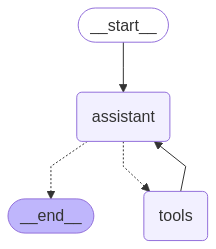

In [24]:
from IPython.display import Image, display

display(Image(react_graph.get_graph().draw_mermaid_png()))
